In [1]:
import numpy as np
import pandas as pd


In [2]:
train = pd.read_csv('/home/arvindputhucode/Downloads/train_data-petrol.csv', header=0 , parse_dates=[0])
train.head()
#type(train.iloc[0,0])

,Date,Petrol (USD)
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28


In [3]:
train['Date'].dtype

dtype('<M8[ns]')

In [4]:
train.describe()
#train.info()

,Petrol (USD)
count,811.000000
mean,110.330481
std,19.241182
min,74.210000
25%,94.525000
50%,112.420000
75%,128.560000
max,189.510000


Since there are certain null values in petrol we need to fix those


In [5]:
train=train.fillna(train.mean)
train.describe()
print(type(train))

<class 'pandas.core.frame.DataFrame'>


/tmp/ipykernel_55328/3663089340.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  train.describe()


In [6]:
train['Petrol (USD)'] = pd.to_numeric(train['Petrol (USD)'], errors='coerce')


In [7]:
features = train.copy()

In [8]:
#import datetime as dt
features['year'] = train['Date'].dt.year
features['month'] = train['Date'].dt.month
features['day'] = train['Date'].dt.day

In [9]:
features.head(5)

,Date,Petrol (USD),year,month,day
0,2003-06-09,74.59,2003,6,9
1,2003-06-16,74.47,2003,6,16
2,2003-06-23,74.42,2003,6,23
3,2003-06-30,74.35,2003,6,30
4,2003-07-07,74.28,2003,7,7


### Lag features

In [10]:
features['lag1'] =  train['Petrol (USD)'].shift(2)

In [11]:
features['lag2'] =  train['Petrol (USD)'].shift(365)

In [12]:
features.head(7)

,Date,Petrol (USD),year,month,day,lag1,lag2
0,2003-06-09,74.59,2003,6,9,NaN,NaN
1,2003-06-16,74.47,2003,6,16,NaN,NaN
2,2003-06-23,74.42,2003,6,23,74.59,NaN
3,2003-06-30,74.35,2003,6,30,74.47,NaN
4,2003-07-07,74.28,2003,7,7,74.42,NaN
5,2003-07-14,74.21,2003,7,14,74.35,NaN
6,2003-07-21,75.07,2003,7,21,74.28,NaN


### Window features

In [13]:
#print(type(train['Petrol (USD)'][0]))
features['Roll_mean'] = train['Petrol (USD)'].rolling(window = 2).mean()

### Expanding features

In [14]:
features['Expand_max'] = train['Petrol (USD)'].expanding().max()

In [15]:
features.head(10)

,Date,Petrol (USD),year,month,day,lag1,lag2,Roll_mean,Expand_max
0,2003-06-09,74.59,2003,6,9,NaN,NaN,NaN,74.59
1,2003-06-16,74.47,2003,6,16,NaN,NaN,74.530,74.59
2,2003-06-23,74.42,2003,6,23,74.59,NaN,74.445,74.59
3,2003-06-30,74.35,2003,6,30,74.47,NaN,74.385,74.59
4,2003-07-07,74.28,2003,7,7,74.42,NaN,74.315,74.59
5,2003-07-14,74.21,2003,7,14,74.35,NaN,74.245,74.59
6,2003-07-21,75.07,2003,7,21,74.28,NaN,74.640,75.07
7,2003-07-28,75.10,2003,7,28,74.21,NaN,75.085,75.10
8,2003-08-04,75.12,2003,8,4,75.07,NaN,75.110,75.12
9,2003-08-11,75.44,2003,8,11,75.10,NaN,75.280,75.44


# Time Series - Data Visualization

<AxesSubplot:>

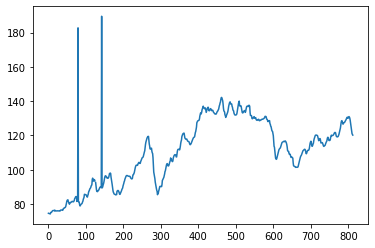

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

Dataviz_df = train.copy()
Dataviz_df.head(10)
Dataviz_df['Petrol (USD)'].plot()

<AxesSubplot:xlabel='Date'>

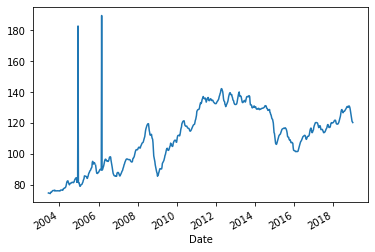

In [17]:
Dataviz_df.index = Dataviz_df['Date']
Dataviz_df['Petrol (USD)'].plot() 

### Zooming In

In [18]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['Date'] > '2014-01-01') & (Dataviz_df['Date'] <= '2015-01-01')].copy()

<AxesSubplot:xlabel='Date'>

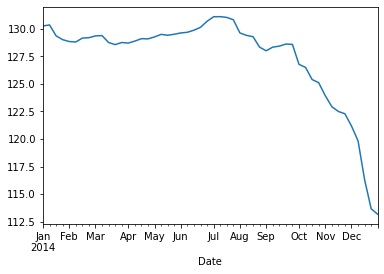

In [19]:
Dataviz_df2['Petrol (USD)'].plot()

### Trendline

<AxesSubplot:ylabel='Petrol (USD)'>

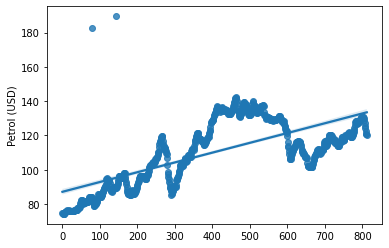

In [20]:
import seaborn as sns
sns.regplot(x= train.index.values, y=train['Petrol (USD)'])

<AxesSubplot:ylabel='Petrol (USD)'>

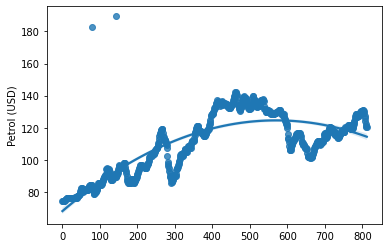

In [21]:
sns.regplot(x= train.index.values, y=train['Petrol (USD)'], order =2)

In [22]:
features.describe
features.head()

,Date,Petrol (USD),year,month,day,lag1,lag2,Roll_mean,Expand_max
0,2003-06-09,74.59,2003,6,9,NaN,NaN,NaN,74.59
1,2003-06-16,74.47,2003,6,16,NaN,NaN,74.530,74.59
2,2003-06-23,74.42,2003,6,23,74.59,NaN,74.445,74.59
3,2003-06-30,74.35,2003,6,30,74.47,NaN,74.385,74.59
4,2003-07-07,74.28,2003,7,7,74.42,NaN,74.315,74.59


In [23]:
features.groupby('year')['Petrol (USD)'].mean()

year
2003     75.592000
2004     82.177885
2005     86.679412
2006     93.472549
2007     94.494717
2008    107.001154
2009     99.593846
2010    116.903654
2011    133.413269
2012    135.750000
2013    134.320000
2014    127.417885
2015    111.033846
2016    108.949423
2017    117.512308
2018    125.032642
Name: Petrol (USD), dtype: float64

<AxesSubplot:xlabel='year'>

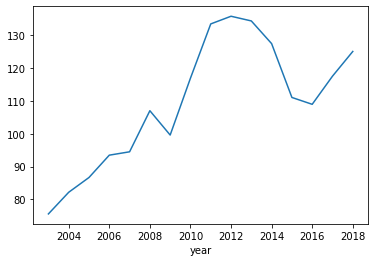

In [24]:
features.groupby('year')['Petrol (USD)'].mean().plot()

<AxesSubplot:xlabel='lag1', ylabel='Petrol (USD)'>

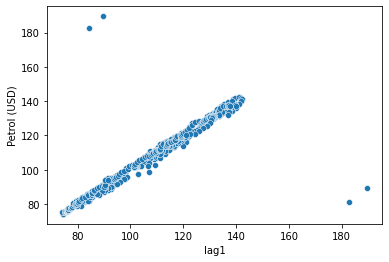

In [25]:
sns.scatterplot(x=features['lag1'], y=features['Petrol (USD)'])

 ***this indicates to us that are certain outliers in the data***

### Autocorrelation Plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

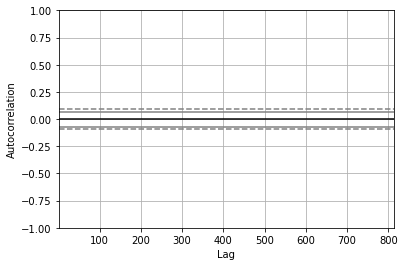

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Petrol (USD)'])

### Upsampling and Downsampling Data


### Downsampling

In [27]:
train_local = pd.read_csv('/home/arvindputhucode/Downloads/train_data-petrol.csv', header=0 , parse_dates=[0])


In [28]:
train_local.head()

,Date,Petrol (USD)
0,2003-06-09,74.59
1,2003-06-16,74.47
2,2003-06-23,74.42
3,2003-06-30,74.35
4,2003-07-07,74.28


In [29]:
quarterly_train_df = train_local.resample('Q', on='Date').mean()

In [30]:
quarterly_train_df.head()

,Petrol (USD)
Date,
2003-06-30,74.457500
2003-09-30,75.528462
2003-12-31,76.004615
2004-03-31,76.603846
2004-06-30,80.243077


In [31]:
yearly_total_train_df = train_local.resample('A', on='Date').sum()

In [32]:
yearly_total_train_df.head()

,Petrol (USD)
Date,
2003-12-31,2267.76
2004-12-31,4273.25
2005-12-31,4420.65
2006-12-31,4767.10
2007-12-31,5008.22


| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling

In [33]:
upsampled_train_df = train_local.resample('D', on='Date').mean()

In [34]:
upsampled_train_df.head(35)

,Petrol (USD)
Date,
2003-06-09,74.59
2003-06-10,NaN
2003-06-11,NaN
2003-06-12,NaN
2003-06-13,NaN
2003-06-14,NaN
2003-06-15,NaN
2003-06-16,74.47
2003-06-17,NaN


In [35]:
interpolated_train_df = upsampled_train_df.interpolate(method='linear')

In [36]:
interpolated_train_df.head(32)

,Petrol (USD)
Date,
2003-06-09,74.590000
2003-06-10,74.572857
2003-06-11,74.555714
2003-06-12,74.538571
2003-06-13,74.521429
2003-06-14,74.504286
2003-06-15,74.487143
2003-06-16,74.470000
2003-06-17,74.462857


<AxesSubplot:xlabel='Date'>

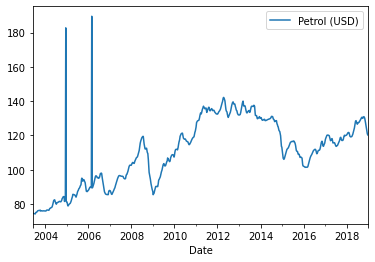

In [37]:
interpolated_train_df.plot()

In [38]:
poly_interpolated_train_df = upsampled_train_df.interpolate(method='spline', order=2)

<AxesSubplot:xlabel='Date'>

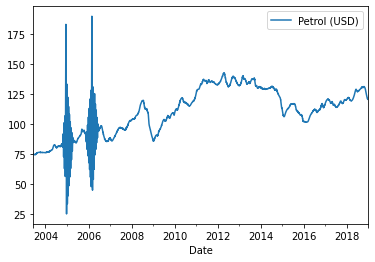

In [39]:
poly_interpolated_train_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
train_decom = pd.read_csv('/home/arvindputhucode/Downloads/train_data-petrol.csv', header=0 , parse_dates=[0])


In [42]:
result = seasonal_decompose(interpolated_train_df['Petrol (USD)'], model='additive')

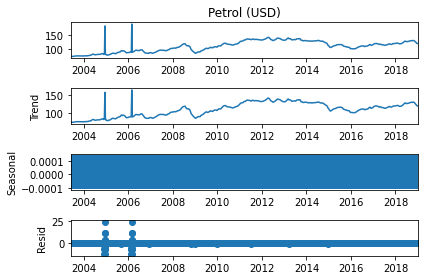

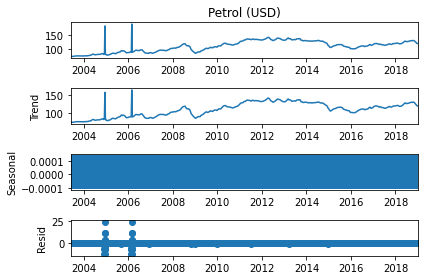

In [43]:
result.plot()

In [44]:
result2 = seasonal_decompose(interpolated_train_df['Petrol (USD)'], model='multiplicative')

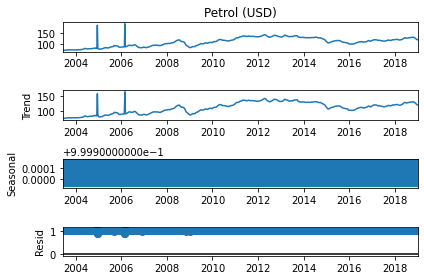

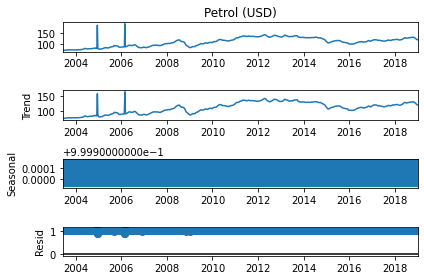

In [45]:
result2.plot()

## Test-Train Split

In [46]:
temp_df = pd.read_csv('/home/arvindputhucode/Downloads/train_data-petrol.csv', header=0 , parse_dates=[0])


In [47]:
temp_df.shape[0]

813

In [48]:
train_size = int(temp_df.shape[0]*0.8)
train_size

650

In [49]:
train_df =  temp_df[0:train_size]

In [50]:
test =  temp_df[train_size:]

## ARIMA Model

In [51]:
df = pd.read_csv('/home/arvindputhucode/Downloads/train_data-petrol.csv', header=0 , parse_dates=[0])


In [52]:
from statsmodels.tsa.arima_model import ARIMA

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

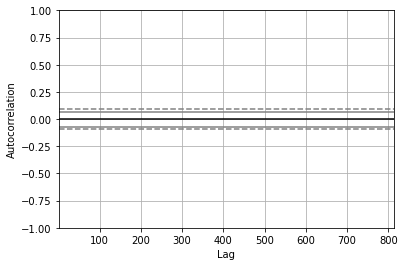

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Petrol (USD)'])

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
model = SARIMAX(df['Petrol (USD)'], order=(5,1,3), seasonal_order=(1,1,1,12))

In [56]:
model_fit = model.fit()

In [57]:
residuals = model_fit.resid

<AxesSubplot:>

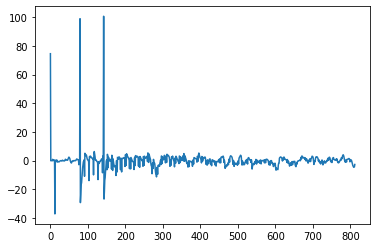

In [58]:
residuals.plot()

In [59]:
output = model_fit.forecast()

In [60]:
output

813    122.156124
dtype: float64

In [61]:
model_fit.forecast(12)

813    122.156124
814    122.998225
815    121.934173
816    121.954872
817    122.002941
818    122.089632
819    122.071747
820    122.048567
821    121.956606
822    121.846496
823    122.752649
824    122.040883
Name: predicted_mean, dtype: float64

In [62]:
yhat = model_fit.predict()

In [63]:
yhat.head()

0     0.000000
1    74.588176
2    74.470062
3    74.419942
4    74.350052
Name: predicted_mean, dtype: float64

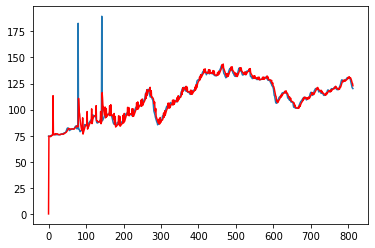

In [64]:
import matplotlib.pyplot as plt
plt.plot(df['Petrol (USD)'])
plt.plot(yhat, color='red')

#### Key observation:
The model is very accurate towars the end except for the outlier points
This was the only reason to not remove them
Now we can go ahead and incorporate removal of outliers using mean since the model seems appropriate

In [89]:
test_df = pd.read_csv('/home/arvindputhucode/Downloads/test_data-petrol.csv', header=0 , parse_dates=[0])


In [90]:
test_df.head()

,Date,Prediction
0,2019-01-01,NaN
1,2019-01-02,NaN
2,2019-01-03,NaN
3,2019-01-04,NaN
4,2019-01-05,NaN


In [93]:
output2 = model_fit.forecast(len(test_df))
type(output2)

pandas.core.series.Series

In [94]:
test_df['Prediction']=output2.values
print(test_df.head())


        Date  Prediction
0 2019-01-01  122.156124
1 2019-01-02  122.998225
2 2019-01-03  121.934173
3 2019-01-04  121.954872
4 2019-01-05  122.002941


In [96]:
old_date_format='%Y-%m-%d'
new_date_format='%d/%m/%Y'


test_df['Date'] = pd.to_datetime(test_df['Date'], format=old_date_format).dt.strftime(new_date_format)
test_df.head()

,Date,Prediction
0,01/01/2019,122.156124
1,02/01/2019,122.998225
2,03/01/2019,121.934173
3,04/01/2019,121.954872
4,05/01/2019,122.002941


In [97]:
test_df.to_csv('/home/arvindputhucode/Downloads/test-answers.csv')